In [25]:
"""Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 """

'Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. \nDraw the inferences from the clusters obtained.\n\nData Description:\n \nThe file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers\n\nID --Unique ID\n\nBalance--Number of miles eligible for award travel\n\nQual_mile--Number of miles counted as qualifying for Topflight status\n\ncc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:\ncc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:\ncc3_miles -- Number of miles earned with Small Busin

In [1]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines (1).xlsx to EastWestAirlines (1).xlsx


In [4]:
import pandas as pd
df = pd.read_excel("EastWestAirlines (1).xlsx", sheet_name = "data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.shape

(3999, 12)

In [6]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [8]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
# duplicate columns and rows
df.duplicated()
df[df.duplicated()]
len(df[df.duplicated()])



0

In [10]:
df.columns.duplicated() 
(df.columns.duplicated()).sum()

0

In [11]:
df.drop(columns=["ID#"], axis=1,inplace=True)
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [12]:
df.shape

(3999, 11)

In [13]:
# Standardization the data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
Y = SS.fit_transform(df)
X = pd.DataFrame(Y)

In [16]:
#K-Means Clustering
from sklearn.cluster import KMeans
km = KMeans()

inertia =[]
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

print("Inertia=", inertia)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Inertia= [43989.000000000015, 35409.511452424376, 30899.24682465222, 27446.372456681347, 24541.329582045757, 21089.973628929638, 19165.86145865565, 17316.866446128264, 16043.406242309495, 14726.983322766802]


<Axes: xlabel='kvalue', ylabel='inertiavalues'>

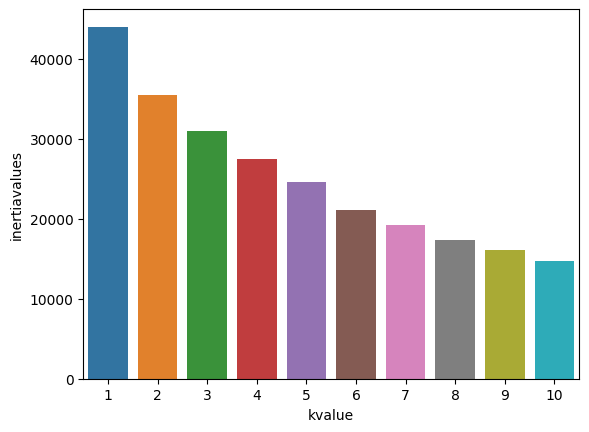

In [19]:
# scree plot
import seaborn as sns
d1 = {"kvalue":range(1,11),"inertiavalues":inertia}
d2 = pd.DataFrame(d1)
sns.barplot(x="kvalue",y="inertiavalues",data= d2,)

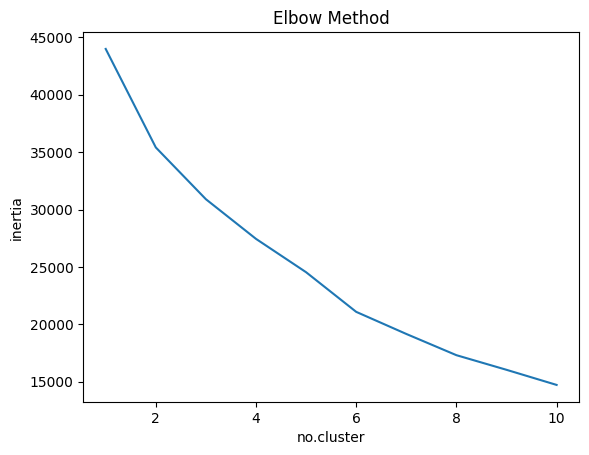

In [18]:
# Elbow plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.plot(range(1,11),inertia)
plt.title("Elbow Method")
plt.xlabel("no.cluster")
plt.ylabel("inertia")
plt.show()

In [20]:
# so we can use 4 and 5 cluster but i choose 4 clusters

km = KMeans(n_clusters=4, n_init=30)
km.fit(X)
Y1 = km.predict(X)
X1 = pd.DataFrame(Y1,columns=["cluster"])
X1.value_counts()

cluster
1          2552
3          1267
0           165
2            15
dtype: int64

In [21]:
new_data = pd.concat([df,X1],axis=1)

In [22]:
#############  Hierarchical clustering  ##############

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean",linkage="complete")
Y = cluster.fit_predict(X)
Y = pd.DataFrame(Y, columns=["cluster1"])
Y.value_counts()
new_data = pd.concat([df,Y],axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [24]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=3)
dbscan.fit_predict(X)
Y = dbscan.labels_
Y = pd.DataFrame(Y,columns=["cluster2"])
Y.value_counts()
clustered = pd.concat([df,Y],axis=1)
noise_data = clustered[clustered["cluster2"]==-1]
noise_data 
final_data = clustered[clustered["cluster2"]==0]
final_data 

#outliers are removed

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster2
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0
